# Data Cleaning & Insights from Kaggle Data Science Survey (2017–2021)
## **Objective**
### **Analyze real-world survey data from Kaggle’s Data Science Survey to understand respondent demographics, preferences, and tool usage — while practicing data cleaning, categorical handling, and insight generation**

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Read the dataset

In [4]:
df = pd.read_csv('kaggle_survey_2017_2021.csv')
df

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106297,2017,NaN,22-24,Female,Other,Master's degree,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106298,2017,NaN,25-29,Male,Indonesia,Bachelor's degree,Programmer,1 to 2 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106299,2017,NaN,25-29,Female,Taiwan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106300,2017,NaN,NaN,Female,Singapore,I prefer not to answer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_raw = pd.read_csv("kaggle_survey_2017_2021.csv", header=None)

df = df_raw[2:].copy()
df.columns = df_raw.iloc[0]  # Set Q1, Q2, Q3 as headers
df = df.reset_index(drop=True)

In [ ]:
df

#  Data Cleaning
### - Check nulls and duplicates

In [7]:
df.info

<bound method DataFrame.info of 0          - Time from Start to Finish (seconds)     Q1      Q2         Q3  \
0       2021                                 910  50-54     Man      India   
1       2021                                 784  50-54     Man  Indonesia   
2       2021                                 924  22-24     Man   Pakistan   
3       2021                                 575  45-49     Man     Mexico   
4       2021                                 781  45-49     Man      India   
...      ...                                 ...    ...     ...        ...   
106296  2017                                 NaN  22-24  Female      Other   
106297  2017                                 NaN  25-29    Male  Indonesia   
106298  2017                                 NaN  25-29  Female     Taiwan   
106299  2017                                 NaN    NaN  Female  Singapore   
106300  2017                                 NaN  25-29    Male      Japan   

0                              

In [9]:
df.duplicated().sum()

4456

In [10]:
df.isnull().sum()

0
-                                           0
Time from Start to Finish (seconds)     16716
Q1                                        445
Q2                                         95
Q3                                        121
                                        ...  
Q38_B_Part_6                           105015
Q38_B_Part_7                           105084
Q38_B_Part_9                           105116
Q38_B_Part_11                          106301
Q38_B_OTHER                            105673
Length: 293, dtype: int64

### Drop Columns with Too Many Missing Values

In [14]:
threshold = len(df) * 1.0
df = df.loc[:, df.isnull().sum() < threshold]

In [15]:
df

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_OTHER
0,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN
3,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106296,2017,NaN,22-24,Female,Other,Master's degree,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106297,2017,NaN,25-29,Male,Indonesia,Bachelor's degree,Programmer,1 to 2 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106298,2017,NaN,25-29,Female,Taiwan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106299,2017,NaN,NaN,Female,Singapore,I prefer not to answer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop Duplicates

In [18]:
df.drop_duplicates(inplace=True)

In [20]:
df.head(3)

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_OTHER
0,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN


### Clean Column Names

In [23]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '')

In [24]:
df

,-,time_from_start_to_finish_(seconds),q1,q2,q3,q4,q5,q6,q7_part_1,q7_part_2,...,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_9,q38_b_other
0,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN
3,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106294,2017,NaN,30-34,Male,People 's Republic of China,Master's degree,DBA/Database Engineer,3 to 5 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106296,2017,NaN,22-24,Female,Other,Master's degree,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106297,2017,NaN,25-29,Male,Indonesia,Bachelor's degree,Programmer,1 to 2 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106299,2017,NaN,NaN,Female,Singapore,I prefer not to answer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  Focus Columns (Mapping)
#### - We’ll rename only useful columns for analysis:

In [37]:
df = df.rename(columns={
    "q1": "age",
    "q2": "gender",
    "q3": "country",
    "q4": "education",
    "q5": "role",
    "q6": "experience"
})


In [39]:
df

,-,time_from_start_to_finish_(seconds),age,gender,country,education,role,experience,q7_part_1,q7_part_2,...,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_9,q38_b_other
0,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN
3,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106294,2017,NaN,30-34,Male,People 's Republic of China,Master's degree,DBA/Database Engineer,3 to 5 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106296,2017,NaN,22-24,Female,Other,Master's degree,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106297,2017,NaN,25-29,Male,Indonesia,Bachelor's degree,Programmer,1 to 2 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106299,2017,NaN,NaN,Female,Singapore,I prefer not to answer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df

,-,time_from_start_to_finish_(seconds),age,gender,country,education,role,experience,q7_part_1,q7_part_2,...,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_9,q38_b_other,gender_cleaned
0,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
1,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
2,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,Male
3,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
4,2021,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106294,2017,NaN,30-34,Male,People 's Republic of China,Master's degree,DBA/Database Engineer,3 to 5 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
106296,2017,NaN,22-24,Female,Other,Master's degree,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female
106297,2017,NaN,25-29,Male,Indonesia,Bachelor's degree,Programmer,1 to 2 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
106299,2017,NaN,NaN,Female,Singapore,I prefer not to answer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female


# Insight 1: Top 5 Countries by Number of Respondents

In [104]:
colors = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464',
          '#FF6F61','#6A5ACD','#20B2AA','#FF8C00','#008080']

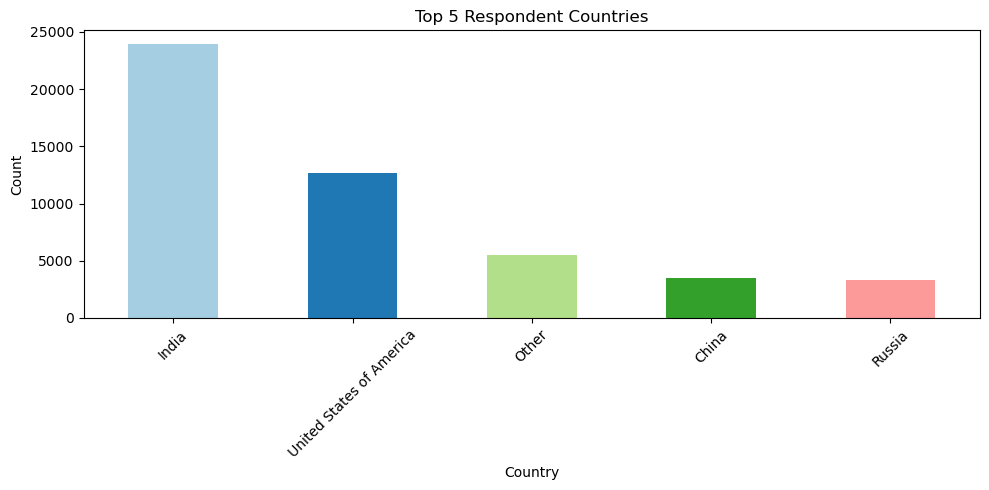

In [118]:
top_countries = df['country'].value_counts().head()

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar',color=sns.color_palette("Paired", 10), title="Top 5 Respondent Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insight 2: Gender Distribution

### Map gender into 3 categories

In [56]:
print(df['gender'].unique())

['Man' 'Woman' 'Nonbinary' 'Prefer not to say' 'Prefer to self-describe'
 'Male' 'Female' 'Non-binary, genderqueer, or gender non-conforming'
 'A different identity' nan]


In [58]:
def map_gender(value):
    if pd.isna(value):
        return 'Other'  
    value = value.strip().lower()
    if value in ['male', 'man']:
        return 'Male'
    elif value in ['female', 'woman']:
        return 'Female'
    else:
        return 'Other'

df['gender_cleaned'] = df['gender'].apply(map_gender)


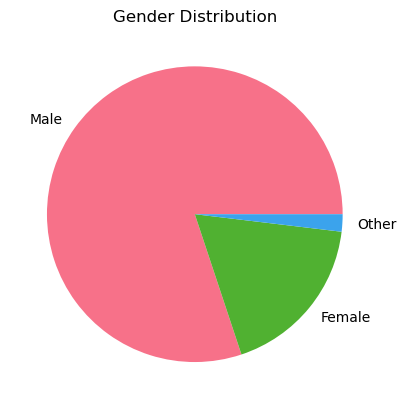

In [114]:
df['gender_cleaned'].value_counts().plot(kind='pie', title="Gender Distribution", colors=sns.color_palette("husl", 3))
plt.ylabel("")
plt.show()

# Insight 3: Age Group Distribution

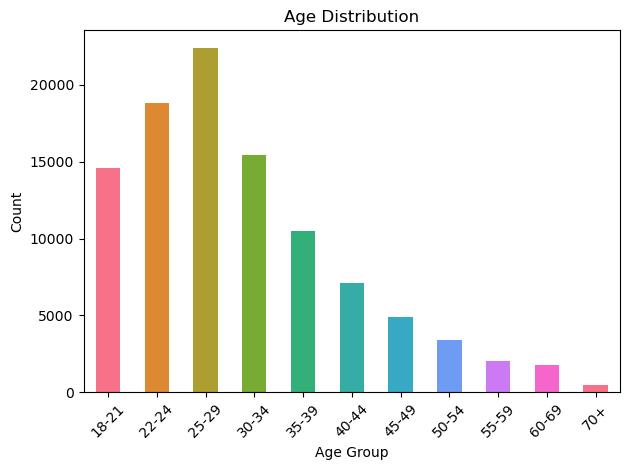

In [110]:
palette = sns.color_palette("husl", len(top_langs))
df['age'].value_counts().sort_index().plot(kind='bar',color=palette, title="Age Distribution",)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Insight 4: Top Job Roles

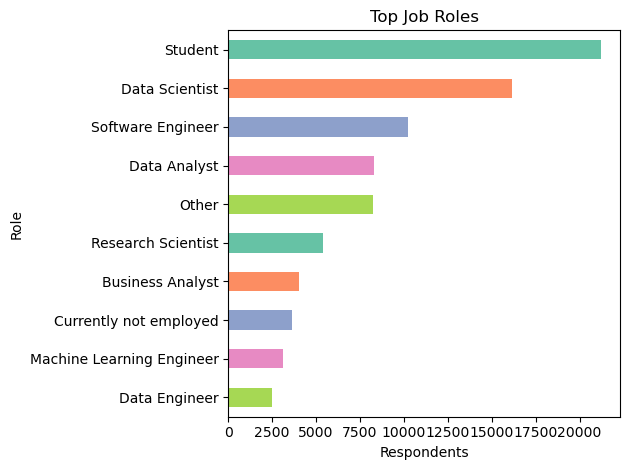

In [112]:
df['role'].value_counts().head(10).plot(kind='barh', title="Top Job Roles", color=sns.color_palette("Set2", len(top_countries)))
plt.xlabel("Respondents")
plt.ylabel("Role")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Insight 5: Highest Education Level

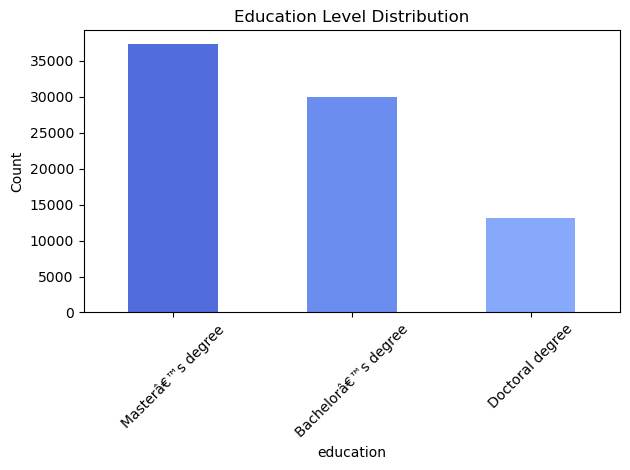

In [116]:
df['education'].value_counts().head(3).plot(kind='bar', color=sns.color_palette("coolwarm", len(df['age'].unique())), title="Education Level Distribution")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()


#  BONUS Insight 6: Most Used Programming Languages 

### Select all Q7 columns
#### Q7 is a multi-select question — data is spread across multiple columns, like:

- Q7_Part_1 → Python

- Q7_Part_2 → R

- Q7_Part_3 → SQL

In [94]:
q7_cols = [col for col in df.columns if 'q7_part' in col]


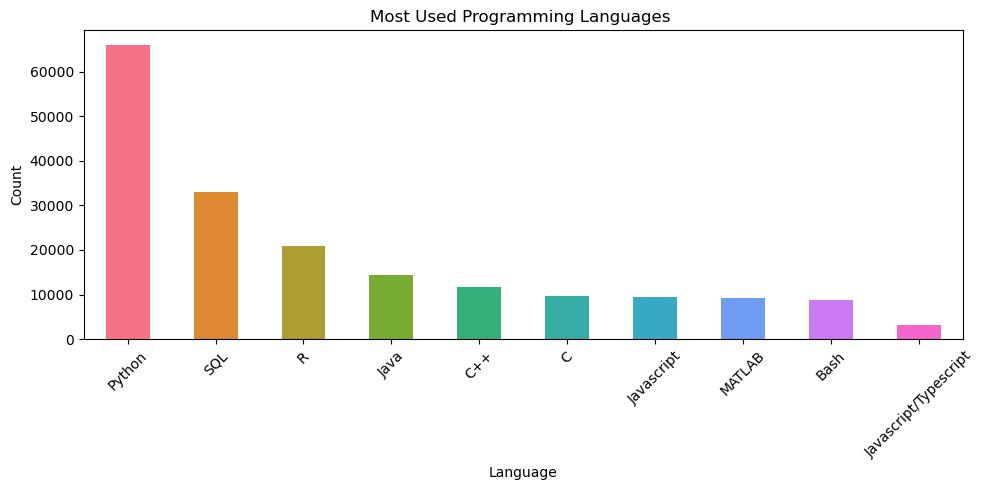

In [120]:
lang_df = df[q7_cols].melt(value_name='language').dropna()

top_langs = lang_df['language'].value_counts().head(10)

top_langs.plot(kind='bar', title='Most Used Programming Languages ',color=sns.color_palette("husl", len(top_langs)), figsize=(10,5))
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# BONUS Insight 7: Most Used IDEs / Tools

### Q10 is a multi-select question — data is spread across multiple columns, like:
#### Q10_Part_1, Q10_Part_2, ..., like Jupyter, VSCode, PyCharm, etc.



In [98]:
q10_cols = [col for col in df.columns if 'q10_part' in col]


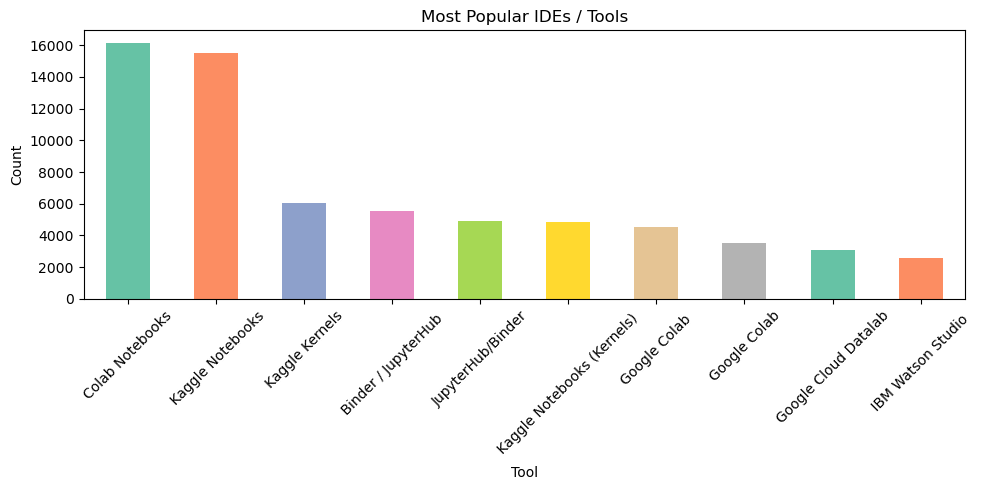

In [122]:
tools_df = df[q10_cols].melt(value_name='tool').dropna()

top_tools = tools_df['tool'].value_counts().head(10)

top_tools.plot(kind='bar',color=sns.color_palette("Set2", len(top_tools)), title='Most Popular IDEs / Tools', figsize=(10,5))
plt.xlabel("Tool")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Conclusion

### - The dataset was successfully cleaned without dropping any major columns.  
### - Categorical variables such as gender were standardized into three classes: Male, Female, and Other.  
### - Key demographic and professional insights were extracted, including:
###  - Most respondents are young professionals or students in their 20s–30s.  
###  - Male participation dominates, though female and other categories are notable.  
###  - The majority of respondents hold at least a bachelor’s or master’s degree.  
###  - Python, SQL, and R are the top programming languages among respondents.  
###  - Jupyter Notebook, VS Code, and PyCharm are the most popular IDEs/tools.  
###  - Respondents are primarily concentrated in a few leading countries.  

### **This project demonstrates data cleaning, categorical handling, and generating meaningful insights from a large survey dataset using Python, pandas, Matplotlib, and Seaborn.**
